In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
import numpy as np
import pylab as plt

import tabulate
from ipywidgets import Label, Button, Output, FloatSlider, HBox, VBox, Layout, HTML, Accordion
from appmode_functions import get_recompute, check_user_value, get_user_value

from widget_code_input import WidgetCodeInput

In [3]:
import scipy as sc
import numpy.linalg as npl
from numpy.linalg import norm
import scipy.linalg as scl
from scipy.spatial.distance import pdist,squareform
import ase
from tqdm import tqdm_notebook as tqdm_cs

In [17]:
from ipywidgets import interactive,FloatSlider,interact


In [4]:
from tools import manipulation_hist,manipulation_LJ_force,manipulation_Harmonique_force,manipulation_LJ,get_numerical_force,manipulation_Harmonique
from tools import visualiser_trajectoire,faire_une_chaine_circulaire,faire_une_chaine_lineaire

# Developper les fonctions pour modeliser une chaine de polymere

<img src="figures/r2_r1-01.png" width="250" height="250" />

## Potentiel harmonique

Le potentiel harmonique est donné par:

$V_{har}\,\left(d\right) = k \,\left(d-r_m\right)^2,$

où $d$ est la longueur du ressort, $r_m$ est la longueur du ressort au repos et $k$ est la constante de raideur du ressort.
Si les extrémités du ressort sont données par les vecteurs $\vec{r_1} = \left(x_1,\, y_1,\,  z_1\right)$ et $\vec{r_2} = \left(x_2,\, y_2,\,  z_2\right)$ respectivement, alors $d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$.


In [7]:
class SetUpHarmonicPotential(object):
    def __init__(self):        
        self.plot_box = Output()
        with self.plot_box:
            self.the_figure, self.the_plot = plt.subplots(figsize=(5,5))
            self.the_plot.set_xlabel("x [l]")
            self.the_plot.set_xlabel("Potentiel [e]")
        
        # set up the value checker
        self.check_function_output = Output()
        self.check_accordion = Accordion(children=[self.check_function_output], selected_index=None)
        self.check_accordion.set_title(0, 'Validation de ta fonction (clique pour voir le résultat)')
        
        # set up the sliders
        r_m_widget = FloatSlider(
            value=2, min=0.50, max=5,step=0.2,
            description=r'\(r_m\)',
            continuous_update=False, 
            style={'description_width': 'initial'}, layout=Layout(width='50%', min_width='350px'))
        k_widget = FloatSlider(
            value=2, min=0.50, max=5,step=0.2,
            description=r'\(k\)',
            continuous_update=False, 
            style={'description_width': 'initial'}, layout=Layout(width='50%', min_width='350px'))
        self.sliders_dict = dict(r_m=r_m_widget,k=k_widget)
        
        # set up the test values
        self.test_values_dict = dict(d=[1,2,3,4],r_m=[1,3],k=[2,3])
        
        # set upt the code widget window
        self.code_widget = WidgetCodeInput(
            function_name="Potentiel_Harmonique", 
            function_parameters="d, r_m, k",
            docstring="""
        Implémente l'énergie potentielle associée à un ressort

        :param d: distance [l]
        :param r_m: distance de repos du ressort [l]
        :param k: force du ressort [e/l] 

        :return: Valeur de l'énergie potentielle du ressort [e]
        """,
            function_body="# Ecrit ta solution\n# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution"
        )
        
        self.widgets = [slider for slider in self.sliders_dict.values()]
        self.widgets += [self.code_widget]
        
        self.input_box = VBox([slider for slider in self.sliders_dict.values()])
        # self.plot = interactive_output(self.replot, self.sliders_dict)
    
    def display(self):
        display(self.code_widget)
        display(self.input_box, self.the_figure)
        display(self.check_accordion)
        
    def reference_func(self,d,r_m,k):
        ### Retourne la valeur du potentiel harmonique
        return k*( d - r_m)**2
    
    def replot(self, r_m, k):
        # Clean up the graph
        self.the_plot.axes.clear()

        circle1 = plt.Circle((0, 2), 0.2, color='b')
        circle2 = plt.Circle((r_m, 2), 0.2, color='r')
        self.the_plot.add_artist(circle1)
        self.the_plot.add_artist(circle2)
        r = np.linspace(-2, 6, num=100)
        self.the_plot.plot(r, self.reference_func(r,r_m,k))


        # plt.show()
        ## (Try to) plot user value
        user_value = None
        try:
            user_value = get_user_value(**{'d',r})
        except Exception:
            # Just a guard not to break the visualization, we should not end up here
            pass 
        try:
            if user_value is not None:
                self.the_plot.plot([user_value], [0], 'or')    
        except Exception:
            # We might end up here if the function does not return a float value
            pass 

        self.the_plot.set_xlim(-0.5,4)
        self.the_plot.set_ylim(-0.5,4)
        # Redraw
        self.the_figure.canvas.draw()
        self.the_figure.canvas.flush_events()


WidgetCodeInput(docstring="\n        Implémente l'énergie potentielle associée à un ressort\n\n        :param d: distance [l]\n        :param r_m: distance de repos du ressort [l]\n        :param k: force du ressort [e/l] \n\n        :return: Valeur de l'énergie potentielle du ressort [e]\n        ", function_body='# Ecrit ta solution\n# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution', function_name='Potentiel_Harmonique', function_parameters='d, r_m, k')

VBox(children=(FloatSlider(value=2.0, continuous_update=False, description='\\(r_m\\)', layout=Layout(min_width='350px', width='50%'), max=5.0, min=0.5, step=0.2, style=SliderStyle(description_width='initial')), FloatSlider(value=2.0, continuous_update=False, description='\\(k\\)', layout=Layout(min_width='350px', width='50%'), max=5.0, min=0.5, step=0.2, style=SliderStyle(description_width='initial'))))

<IPython.core.display.Javascript object>


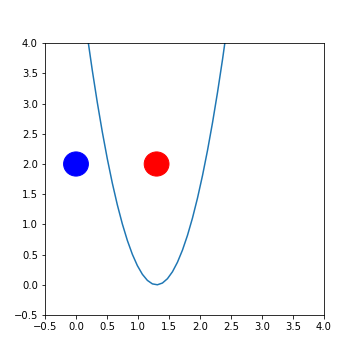

Accordion(children=(Output(),), selected_index=None, _titles={'0': 'Validation de ta fonction (clique pour voir le résultat)'})

In [8]:
setup_class = SetUpHarmonicPotential()

recompute = get_recompute(setup_class)

_ = recompute(None)

setup_class.display()

## Force d'un ressort

En 1D, la force ressentie à l'extrémité d'un ressort est:

${F}_{Har}\left(x\right) = - \frac{dV_{Har}(x)}{dx} = - 2x k \, (x - r_m).$


De la même manière, la force ressentie à l'extrémité d'un ressort en trois dimension est:

$\vec{F}_{Har}\left(\vec{r}_{12}\right)  = \frac{\vec{r}_{12} }{d} \,F_{Har}\left(d\right) =  - 2 k \, (d - r_m)  \frac{\vec{r}_{12} }{d},$

 sur la particule 2, situé en $\vec{r}_{2}=(x_2,y_2,z_2)$,

où $\vec{r}_{12}=\vec{r}_{1}-\vec{r}_{2}=(x_1-x_2,y_1-y_2,z_1-z_2)$ est le vecteur qui va d'une extrémité du ressort, situé en $\vec{r}_{1}=(x_1,y_1,z_1)$, à l'autre, situé en $\vec{r}_{2}=(x_2,y_2,z_2)$, et $d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$ est la longueur du vecteur $\vec{r}_{12}$.
Donc la norme de la force harmonique est donnée par:

$F_{Har}\left(d\right) =  - 2 k \, (d - r_m)$

In [28]:
class SetUpHarmonicForce(object):
    def __init__(self):        
        self.plot_box = Output()
        with self.plot_box:
            self.the_figure, self.the_plot = plt.subplots(figsize=(5,5))
            self.the_plot.set_xlabel("x [l]")
            self.the_plot.set_xlabel("Force [e/l]")
        self.r_m, self.k_spring = 2, 1
        # set up the value checker
        self.check_function_output = Output()
        self.check_accordion = Accordion(children=[self.check_function_output], selected_index=None)
        self.check_accordion.set_title(0, 'Validation de ta fonction (clique pour voir le résultat)')
        
        # set up the sliders
        d_widget = FloatSlider(
            value=self.r_m, min=0.50, max=5,step=0.1,
            description=r'\(d\)',
            continuous_update=False, 
            style={'description_width': 'initial'}, layout=Layout(width='50%', min_width='350px'))
        
        self.sliders_dict = dict(d=d_widget)
        
        # set up the test values
        self.test_values_dict = dict(d=[1,2,3,4],r_m=[1,3],k=[2,3])
        
        # set upt the code widget window
        self.code_widget = WidgetCodeInput(
            function_name="Force_Harmonique", 
            function_parameters="d, r_m, k",
            docstring="""
        Calcule la norme de la force associée à un ressort

        :param d: distance entre les particules [l]
        :param r_m: distance de repos du ressort [l]
        :param k: force du ressort [e/l] 

        :return: Valeur de la norme de la force associée à un ressort [e/l]
        """,
            function_body="# Ecrit ta solution\n# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution"
        )
        
        self.widgets = [slider for slider in self.sliders_dict.values()]
        self.widgets += [self.code_widget]
        
        self.input_box = VBox([slider for slider in self.sliders_dict.values()])
    
    def display(self):
        display(self.code_widget)
        display(self.input_box, self.the_figure)
        display(self.check_accordion)
        
    def reference_func(self,d,r_m,k):
        ### Retourne la valeur de la force harmonique
        return - 2*k * (d - r_m)
    def harm_pot(self,d,r_m,k):
        ### Retourne la valeur du potentiel harmonique
        return k*( d - r_m)**2
    
    def replot(self, d):
        font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
        
        r_m, k_spring = self.r_m, self.k_spring
        
        # Clean up the graph
        self.the_plot.axes.clear()

        circle1 = plt.Circle((0, 2), 0.2, color='b')
        circle2 = plt.Circle((d, 2), 0.2, color='r')
        self.the_plot.add_artist(circle1)
        self.the_plot.add_artist(circle2)
        
        st = np.array([d,2])
        if abs(d -r_m) > 1e-12:
            end = np.array([self.reference_func(d,r_m,k_spring),2])
            nnn = end - np.array([0,2])
            self.the_plot.arrow(st[0], st[1],nnn[0]/abs(self.reference_func(0.5,r_m,k_spring)), 
                     nnn[1], head_width=0.25, head_length=0.15, fc='k', ec='k',width=0.05)
            plt.text(2, 3, r'$F_{Harm}=$'+'{val:.1f}'.format(val=end[0]), fontdict=font)
        else:
            plt.text(2, 3, r'$F_{Harm}=$'+'{val:.1f}'.format(val=0), fontdict=font)
            
        r = np.linspace(-0.5, 4, num=100)
        self.the_plot.plot(r, self.harm_pot(r,r_m,k_spring))
        
        
        ## (Try to) plot user value
        user_value = None
        try:
            user_value = get_user_value(**{'d',r})
        except Exception:
            # Just a guard not to break the visualization, we should not end up here
            pass 
        try:
            if user_value is not None:
                self.the_plot.plot([user_value], [0], 'or')    
        except Exception:
            # We might end up here if the function does not return a float value
            pass 

        self.the_plot.set_xlim(-0.5,4)
        self.the_plot.set_ylim(-0.5,4)
        # Redraw
        self.the_figure.canvas.draw()
        self.the_figure.canvas.flush_events()
        

WidgetCodeInput(docstring='\n        Calcule la norme de la force associée à un ressort\n\n        :param d: distance [l]\n        :param r_m: distance de repos du ressort [l]\n        :param k: force du ressort [e/l] \n\n        :return: Valeur de la norme de la force associée à un ressort [e/l]\n        ', function_body='# Ecrit ta solution\n# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution', function_name='Force_Harmonique', function_parameters='d, r_m, k')

VBox(children=(FloatSlider(value=2.0, continuous_update=False, description='\\(d\\)', layout=Layout(min_width='350px', width='50%'), max=5.0, min=0.5, style=SliderStyle(description_width='initial')),))

<IPython.core.display.Javascript object>


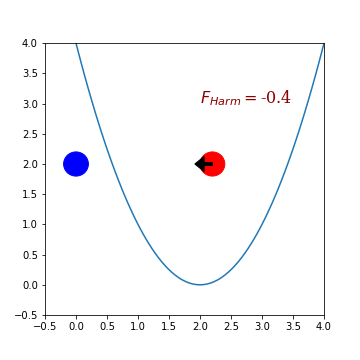

Accordion(children=(Output(),), selected_index=None, _titles={'0': 'Validation de ta fonction (clique pour voir le résultat)'})

In [30]:
setup_class = SetUpHarmonicForce()

recompute = get_recompute(setup_class)

_ = recompute(None)

setup_class.display()

## Potentiel de Lennard Jones

Le potentiel de Lennard Jones exercé par la particule 1 sur la particule 2 est:

$V_{LJ}\left(d\right)= \epsilon \left[\left(\frac{r_m}{d}\right)^{12}-2\left(\frac{r_m}{d}\right)^{6}\right],$

où $\vec{r}_{12}=\vec{r}_{1}-\vec{r}_{2}=(x_1-x_2,y_1-y_2,z_1-z_2)$ est le vecteur qui va de la particule 1, situé en $\vec{r}_{1}=(x_1,y_1,z_1)$, sur la particule 2, situé en $\vec{r}_{2}=(x_2,y_2,z_2)$, et $d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$ est la longueur du vecteur $\vec{r}_{12}$.


In [35]:
class SetUpLJPotential(object):
    def __init__(self):        
        self.plot_box = Output()
        with self.plot_box:
            self.the_figure, self.the_plot = plt.subplots(figsize=(5,5))
            self.the_plot.set_xlabel("x [l]")
            self.the_plot.set_xlabel("Potentiel [e]")
        
        # set up the value checker
        self.check_function_output = Output()
        self.check_accordion = Accordion(children=[self.check_function_output], selected_index=None)
        self.check_accordion.set_title(0, 'Validation de ta fonction (clique pour voir le résultat)')
        
        # set up the sliders
        r_m_widget = FloatSlider(
            value=2, min=0.10, max=5,step=0.2,
            description=r'\(r_m\)',
            continuous_update=False, 
            style={'description_width': 'initial'}, layout=Layout(width='50%', min_width='350px'))
        epsilon_widget = FloatSlider(
            value=2, min=0.10, max=5,step=0.2,
            description=r'\(k\)',
            continuous_update=False, 
            style={'description_width': 'initial'}, layout=Layout(width='50%', min_width='350px'))
        self.sliders_dict = dict(r_m=r_m_widget,epsilon=epsilon_widget)
        
        # set up the test values
        self.test_values_dict = dict(d=[1,2,3,4],r_m=[1,3],epsilon=[2,3])
        
        # set upt the code widget window
        self.code_widget = WidgetCodeInput(
            function_name="Potentiel_Lennard_Jones", 
            function_parameters="d, r_m, epsilon",
            docstring="""
        Implémente l'énergie potentielle associée à un ressort

        :param d: distance [l]
        :param r_m: distance au minimum [l]
        :param epsilon: échelle d'énergie [e] 

        :return: Valeur de l'énergie potentielle de Lennard-Jones [e]
        """,
            function_body="# Ecrit ta solution\n# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution"
        )
        
        self.widgets = [slider for slider in self.sliders_dict.values()]
        self.widgets += [self.code_widget]
        
        self.input_box = VBox([slider for slider in self.sliders_dict.values()])
    
    def display(self):
        display(self.code_widget)
        display(self.input_box, self.the_figure)
        display(self.check_accordion)
        
    def reference_func(self,d,r_m,epsilon):
        ### Retourne la valeur du potentiel LJ
        return epsilon*( (r_m/d)**12 - 2*(r_m/d)**6)
    
    def replot(self, r_m, epsilon):
        # Clean up the graph
        self.the_plot.axes.clear()

        circle1 = plt.Circle((0, 2), 0.2, color='b')
        circle2 = plt.Circle((r_m, 2), 0.2, color='r')
        self.the_plot.add_artist(circle1)
        self.the_plot.add_artist(circle2)
        r = np.linspace(-2, 6, num=100)
        self.the_plot.plot(r, self.reference_func(r,r_m,epsilon))
        
        # plt.show()
        ## (Try to) plot user value
        user_value = None
        try:
            user_value = get_user_value(**{'d',r})
        except Exception:
            # Just a guard not to break the visualization, we should not end up here
            pass 
        try:
            if user_value is not None:
                self.the_plot.plot([user_value], [0], 'or')    
        except Exception:
            # We might end up here if the function does not return a float value
            pass 

        self.the_plot.set_xlim(-0.5,4)
        self.the_plot.set_ylim(-2.5,3)
        # Redraw
        self.the_figure.canvas.draw()
        self.the_figure.canvas.flush_events()


WidgetCodeInput(docstring="\n        Implémente l'énergie potentielle associée à un ressort\n\n        :param d: distance [l]\n        :param r_m: distance au minimum [l]\n        :param epsilon: échelle d'énergie [e] \n\n        :return: Valeur de l'énergie potentielle de Lennard-Jones [e]\n        ", function_body='# Ecrit ta solution\n# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution', function_name='Potentiel_Lennard_Jones', function_parameters='d, r_m, epsilon')

VBox(children=(FloatSlider(value=2.0, continuous_update=False, description='\\(r_m\\)', layout=Layout(min_width='350px', width='50%'), max=5.0, min=0.1, step=0.2, style=SliderStyle(description_width='initial')), FloatSlider(value=2.0, continuous_update=False, description='\\(k\\)', layout=Layout(min_width='350px', width='50%'), max=5.0, min=0.1, step=0.2, style=SliderStyle(description_width='initial'))))

<IPython.core.display.Javascript object>


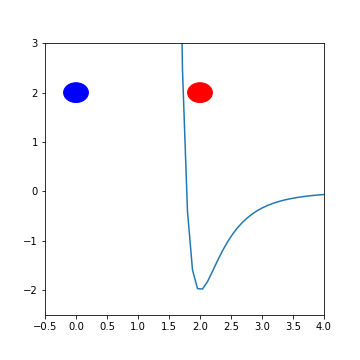

Accordion(children=(Output(),), selected_index=None, _titles={'0': 'Validation de ta fonction (clique pour voir le résultat)'})

In [36]:
setup_class = SetUpLJPotential()

recompute = get_recompute(setup_class)

_ = recompute(None)

setup_class.display()

## Force de Lennard Jones

La force de Lennard Jones exercée par une particule 1 sur une particule 2 en trois dimension est:

$\vec{F}_{LJ}\left(\vec{r}_{12}\right)  = \frac{\vec{r}_{12} }{d} \,F_{LJ}\left(d\right) = \frac{\vec{r}_{12} }{d}  \frac{12 \epsilon}{d} \left[\left(\frac{r_m}{d}\right)^{12}-\left(\frac{r_m}{d}\right)^{6}  \right],$

où $\vec{r}_{12}=\vec{r}_{1}-\vec{r}_{2}=(x_1-x_2,y_1-y_2,z_1-z_2)$ est le vecteur qui va de la particule 1, situé en $\vec{r}_{1}=(x_1,y_1,z_1)$, sur la particule 2, situé en $\vec{r}_{2}=(x_2,y_2,z_2)$, et $d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$ est la longueur du vecteur $\vec{r}_{12}$.
Donc la norme de la force de Lennard Jones est donnée par:

$F_{LJ}\left(d\right) = \frac{\vec{r}_{12} }{d}  \frac{12 \epsilon}{d} \left[\left(\frac{r_m}{d}\right)^{12}-\left(\frac{r_m}{d}\right)^{6}  \right]$

In [41]:
class SetUpLJForce(object):
    def __init__(self):        
        self.plot_box = Output()
        with self.plot_box:
            self.the_figure, self.the_plot = plt.subplots(figsize=(5,5))
            self.the_plot.set_xlabel("x [l]")
            self.the_plot.set_xlabel("Force [e/l]")
        self.r_m, self.epsilon = 2, 1
        # set up the value checker
        self.check_function_output = Output()
        self.check_accordion = Accordion(children=[self.check_function_output], selected_index=None)
        self.check_accordion.set_title(0, 'Validation de ta fonction (clique pour voir le résultat)')
        
        # set up the sliders min=r_m-0.3, max=4, step=0.1
        d_widget = FloatSlider(
            value=self.r_m, min=self.r_m-0.3, max=4,step=0.1,
            description=r'\(d\)',
            continuous_update=False, 
            style={'description_width': 'initial'}, layout=Layout(width='50%', min_width='350px'))
        
        self.sliders_dict = dict(d=d_widget)
        
        # set up the test values
        self.test_values_dict = dict(d=[1,2,3,4],r_m=[1,3],epsilon=[2,3])
        
        # set upt the code widget window
        self.code_widget = WidgetCodeInput(
            function_name="Force_Lennard_Jones", 
            function_parameters="d, r_m, epsilon",
            docstring="""
        Calcule la norme de la force associée à un ressort

        :param d: distance entre les particules [l]
        :param r_m: distance du minimum [l]
        :param epsilon: force de Lennard Jones [e] 

        :return: Valeur de la norme de la force associée au potentiel de Lennard Jones [e/l]
        """,
            function_body="# Ecrit ta solution\n# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution"
        )
        
        self.widgets = [slider for slider in self.sliders_dict.values()]
        self.widgets += [self.code_widget]
        
        self.input_box = VBox([slider for slider in self.sliders_dict.values()])
    
    def display(self):
        display(self.code_widget)
        display(self.input_box, self.the_figure)
        display(self.check_accordion)
        
    def reference_func(self,d,r_m,epsilon):
        ### Retourne la valeur de la force harmonique
        return  12  * epsilon * ( (r_m/d)**12 - (r_m/d)**6 ) / d
    
    def LJ_pot(self,d,r_m,epsilon):
        ### Retourne la valeur du potentiel LJ
        return epsilon*( (r_m/d)**12 - 2*(r_m/d)**6)
    
    def replot(self, d):
        font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
        
        r_m, epsilon = self.r_m, self.epsilon
        
        # Clean up the graph
        self.the_plot.axes.clear()

        circle1 = plt.Circle((0, 2), 0.2, color='b')
        circle2 = plt.Circle((d, 2), 0.2, color='r')
        self.the_plot.add_artist(circle1)
        self.the_plot.add_artist(circle2)
        
        st = np.array([d,2])
        if abs(d - r_m) > 1e-12:
            end = np.array([self.reference_func(d,r_m,epsilon),2])
            nnn = end - np.array([0,2])
            self.the_plot.arrow(st[0], st[1],nnn[0]/abs(self.reference_func(r_m-0.3,r_m,epsilon)), 
                     nnn[1], head_width=0.25, head_length=0.15, fc='k', ec='k',width=0.05)
            plt.text(2, 0.65, r'$F_{LJ}=$'+'{val:.1f}'.format(val=end[0]), fontdict=font)
        else:
            plt.text(2, 0.65, r'$F_{LJ}=$'+'{val:.1f}'.format(val=0), fontdict=font)
            
        r = np.linspace(0.01, 4, num=1000)
        self.the_plot.plot(r, self.LJ_pot(r,r_m,epsilon))
        
        
        ## (Try to) plot user value
        user_value = None
        try:
            user_value = get_user_value(**{'d',r})
        except Exception:
            # Just a guard not to break the visualization, we should not end up here
            pass 
        try:
            if user_value is not None:
                self.the_plot.plot([user_value], [0], 'or')    
        except Exception:
            # We might end up here if the function does not return a float value
            pass 

        self.the_plot.set_xlim(-0.5,4)
        self.the_plot.set_ylim(-1.5,3)
        # Redraw
        self.the_figure.canvas.draw()
        self.the_figure.canvas.flush_events()
        

WidgetCodeInput(docstring='\n        Calcule la norme de la force associée à un ressort\n\n        :param d: distance entre les particules [l]\n        :param r_m: distance de repos du ressort [l]\n        :param epsilon: force de Lennard Jones [e] \n\n        :return: Valeur de la norme de la force associée au potentiel de Lennard Jones [e/l]\n        ', function_body='# Ecrit ta solution\n# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution', function_name='Force_Lennard_Jones', function_parameters='d, r_m, epsilon')

VBox(children=(FloatSlider(value=2.0, continuous_update=False, description='\\(d\\)', layout=Layout(min_width='350px', width='50%'), max=4.0, min=1.7, style=SliderStyle(description_width='initial')),))

<IPython.core.display.Javascript object>


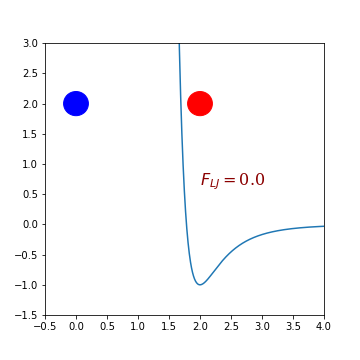

Accordion(children=(Output(),), selected_index=None, _titles={'0': 'Validation de ta fonction (clique pour voir le résultat)'})

In [43]:
setup_class = SetUpLJForce()

recompute = get_recompute(setup_class)

_ = recompute(None)

setup_class.display()

# Calculer les forces entre les particules

Le polymère est représenté par une chaine de $N$ particules. 
+ La chaine est modélisée par l'interaction harmonique entre les particules en suivant leur numérotation: la particule $i$ interagit avec la particule $i+1$ et $i-1$ et les deux extrémités sont libre. 
+ L'interaction entre toutes les particules est approximée par la force de Lennard Jones. La force appliquée sur la particule $i$ est donc:

$\vec{F}_{i} = \sum_{j}^{N} \left(\vec{F}_{LJ}^{\,ij} + \vec{F}_{Harm}^{\,ij} \right),$

$\vec{F}_{i} =  \sum_{j,j\neq i}^{N} \frac{\vec{r}^{\,ij}}{d^{\,ij}} \,F_{LJ}\left(d^{\,ij}\right)  + \left[ \frac{\vec{r}^{\,i-1,i}}{d^{\,i-1,i}} \,F_{Harm}\left(d^{\,i-1,i}\right) + \frac{\vec{r}^{\,i,i+1}}{d^{\,i,i+1}} \,F_{Harm}\left(d^{\,i,i+1}\right) \right],$

où le vecteur $\vec{r}^{\,ij} = \left(x^{i}-x^{j},\,y^{i}-y^{j},\,  z^{i}-z^{j}\right)  $ est le vecteur qui va de la particule $i$ à la particule $j$ et $d^{\,ij}=\sqrt{(x_i-x_j)^2+(y_i-y_j)^2+(z_i-z_j)^2}$ est la longueur du vecteur $\vec{r}^{\,ij}$.


## Calculer les forces de Lennard Jones entre chaque particules


$\vec{F}_{i}^{LJ} =  \sum_{j,j\neq i}^{N} \frac{\vec{r}^{\,ij}}{d^{\,ij}} \,F_{LJ}\left(d^{\,ij}\right)$


<img src="figures/poly_chain-01.png" width="500" height="250" />

**Algorithme**:

$E_{LJ} = 0$ et $\vec{F}_{i}^{LJ}=0$ pour i=0,1,...,Nparticule-1

pour i de 0 a Nparticule-1:

    pour j de 0 a Nparticule-1:
    
        si j est different de i:
            
            Ajouter à la force et à l'energie la contribution de ij
+ $\vec{F}_{i}^{LJ} \mathrel{+}= \frac{\vec{r}^{\,ij}}{d^{\,ij}} \,F_{LJ}\left(d^{\,ij}\right)$
+ $E_{LJ} \mathrel{+}= 0.5 V_{LJ}\left(d^{\,ij}\right)$
        

In [17]:
def calculer_forces_LJ(positions,r_m,epsilon):
    # Nombre de particules dans le système
    Nparticule,_ = positions.shape
    # liste des forces appliquees a chaque particule
    forces = np.zeros((Nparticule,3))
    energy = 0
    
    ### Calcule la somme des forces de LJ appliquées par toutes les particules j sur chaque particule i
    for ipart in range(Nparticule):
        for jpart in range(Nparticule):
            if jpart != ipart:
                r = positions[ipart]-positions[jpart]
                d = np.linalg.norm(r)
                forces[ipart] += (r/d)*Force_LennardJones(d,r_m,epsilon)
                energy += Potentiel_LennardJones(d,r_m,epsilon)
    energy *= 0.5
    return forces,energy

In [67]:
class SetUpLJForce(object):
    def __init__(self):        
        
        # set up the value checker
        self.check_function_output = Output()
        self.check_accordion = Accordion(children=[self.check_function_output], selected_index=None)
        self.check_accordion.set_title(0, 'Validation de ta fonction (clique pour voir le résultat)')
        
        r_m_widget = FloatSlider(
            value=2, min=0.10, max=5,step=0.2,
            description=r'\(r_m\)',
            continuous_update=False, 
            style={'description_width': 'initial'}, layout=Layout(width='50%', min_width='350px'))
        epsilon_widget = FloatSlider(
            value=2, min=0.10, max=5,step=0.2,
            description=r'\(k\)',
            continuous_update=False, 
            style={'description_width': 'initial'}, layout=Layout(width='50%', min_width='350px'))
        self.sliders_dict = dict(r_m=r_m_widget,epsilon=epsilon_widget)
        
        
        # set up the test values
        np.random.seed(10)
        positions_list = [np.random.rand(5,3), np.random.rand(5,3), np.random.rand(5,3)]
        self.test_values_dict = dict(positions=positions_list,r_m=[1,3],epsilon=[2,3])
        
        # set upt the code widget window
        self.code_widget = WidgetCodeInput(
            function_name="Force_Lennard_Jones_entre_particules", 
            function_parameters="positions, r_m, epsilon",
            docstring="""
        Calcule les forces de Lennard Jones entre les particules du système

        :param positions: list des positions des particules de la forme (Nparticules, 3) [l]
        :param r_m: distance du minimum [l]
        :param epsilon: force de Lennard Jones [e] 

        :return: list des forces de Lennard Jones de la forme (Nparticules, 3) [e/l]
        """,
            function_body=
"""# Nombre de particules dans le système
Nparticule,_ = positions.shape
# liste des forces appliquees a chaque particule
forces = np.zeros((Nparticule,3))
energy = 0

# Ecrit ta solution
# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution
### Calcule la somme des forces de LJ appliquées par toutes les particules j sur chaque particule i


return forces
               """
        )
        
        self.widgets = [slider for slider in self.sliders_dict.values()]
        self.widgets += [self.code_widget]
        
        self.input_box = VBox([slider for slider in self.sliders_dict.values()])
    
    def display(self):
        display(self.code_widget)
        display(self.input_box)
        display(self.check_accordion)
        
    def Force_LennardJones(self,d,r_m,epsilon):
        ### Retourne la valeur de la force harmonique
        return  12  * epsilon * ( (r_m/d)**12 - (r_m/d)**6 ) / d
    
    def Potentiel_LennardJones(self,d,r_m,epsilon):
        ### Retourne la valeur du potentiel LJ
        return epsilon*( (r_m/d)**12 - 2*(r_m/d)**6)
        
    def reference_func(self,positions,r_m,epsilon):
        # Nombre de particules dans le système
        Nparticule,_ = positions.shape
        # liste des forces appliquees a chaque particule
        forces = np.zeros((Nparticule,3))
        energy = 0

        ### Calcule la somme des forces de LJ appliquées par toutes les particules j sur chaque particule i
        for ipart in range(Nparticule):
            for jpart in range(Nparticule):
                if jpart != ipart:
                    r = positions[ipart]-positions[jpart]
                    d = np.linalg.norm(r)
                    forces[ipart] += (r/d)*self.Force_LennardJones(d,r_m,epsilon)
                    energy += self.Potentiel_LennardJones(d,r_m,epsilon)
        energy *= 0.5
        return forces
    
    
    def replot(self, *args, **kwargs):
        pass
        

In [70]:
a,b,c = setup_class.test_values_dict['positions'][0],setup_class.test_values_dict['r_m'][0],setup_class.test_values_dict['epsilon'][0]
setup_class.reference_func(a,b,c)

array([[ 3.48296204e+02, -7.06143619e+03,  6.02975335e+03],
       [ 1.16671693e+04,  1.34846342e+03, -4.83122559e+03],
       [-1.15108701e+04,  6.28223066e+03, -2.97564981e+03],
       [ 1.04536046e+09,  2.14503141e+09,  1.74375189e+09],
       [-1.04536097e+09, -2.14503198e+09, -1.74375011e+09]])

In [69]:
setup_class = SetUpLJForce()

recompute = get_recompute(setup_class)

_ = recompute(None)

setup_class.display()

WidgetCodeInput(docstring='\n        Calcule les forces de Lennard Jones entre les particules du système\n\n        :param positions: list des positions des particules de la forme (Nparticules, 3) [l]\n        :param r_m: distance du minimum [l]\n        :param epsilon: force de Lennard Jones [e] \n\n        :return: list des forces de Lennard Jones de la forme (Nparticules, 3) [e/l]\n        ', function_body='# Nombre de particules dans le système\nNparticule,_ = positions.shape\n# liste des forces appliquees a chaque particule\nforces = np.zeros((Nparticule,3))\nenergy = 0\n\n# Ecrit ta solution\n# Après avoir modifié la fonction, déplace un des sliders pour valider ta solution\n### Calcule la somme des forces de LJ appliquées par toutes les particules j sur chaque particule i\n\n\nreturn forces\n               ', function_name='Force_Lennard_Jones_entre_particules', function_parameters='positions, r_m, epsilon')

VBox(children=(FloatSlider(value=2.0, continuous_update=False, description='\\(r_m\\)', layout=Layout(min_width='350px', width='50%'), max=5.0, min=0.1, step=0.2, style=SliderStyle(description_width='initial')), FloatSlider(value=2.0, continuous_update=False, description='\\(k\\)', layout=Layout(min_width='350px', width='50%'), max=5.0, min=0.1, step=0.2, style=SliderStyle(description_width='initial'))))

Accordion(children=(Output(),), selected_index=None, _titles={'0': 'Validation de ta fonction (clique pour voir le résultat)'})

In [18]:
r_m,epsilon = 0.2,1
positions = np.random.rand(4,3)

In [19]:
calculer_forces_LJ(positions,r_m,epsilon)

(array([[ 1.16867677,  0.20037205,  0.69499194],
        [-0.07089667, -0.47042572,  0.02199136],
        [-1.14323653,  0.25868336, -0.76475018],
        [ 0.04545643,  0.01137031,  0.04776688]]), -0.1194239273294577)

## Calculer les forces des ressorts entre chaque particules de la chaine

$\vec{F}_{i}^{Harm} =  \frac{\vec{r}^{\,i-1,i}}{d^{\,i-1,i}}\,F_{Harm}\left(d^{\,i-1,i}\right) + \frac{\vec{r}^{\,i,i+1}}{d^{\,i,i+1}} \,F_{Harm}\left(d^{\,i,i+1}\right) $

<img src="figures/spring_chain.png" width="500" height="250" />


**Algorithme**:


$E_{Harm} = 0$ et $\vec{F}_{i}^{Harm} = 0 $ pour i=0,1,...,Nparticule-1

pour i de 0 a Nresort:
+ $\vec{F}_{i}^{Harm} =  \vec{\hat{r}}^{\,i,i+1} \,F_{Harm}\left(d^{\,i,i+1}\right)$
+ $\vec{F}_{i+1}^{Harm} =  - \vec{\hat{r}}^{\,i,i+1} \,F_{Harm}\left(d^{\,i,i+1}\right)$
+ $E_{Harm} \mathrel{+}= V_{Harm}\left(d^{\,i,i+1}\right)$

In [20]:
def calculer_forces_harmoniques(positions,r_m,k_spring):
    Nparticule,_ = positions.shape
    Nresort = Nparticule-1
    # liste des forces appliquees a chaque particule
    forces = np.zeros((Nparticule,3))
    energy = 0
    # TODO
    for iresort in range(Nresort):
        r = positions[iresort]-positions[iresort+1]
        d = np.linalg.norm(r)
        f =  Force_Harmonique(d,r_m,k_spring) * (r/d)
        forces[iresort] += f
        forces[iresort+1] -= f
        energy += Potentiel_Harmonique(d,r_m,k_spring)
    
    return forces,energy

In [21]:
r_m,k_spring = 0.2,1
positions = np.random.rand(4,3)

In [22]:
calculer_forces_harmoniques(positions,r_m,k_spring)

(array([[ 0.1106733 ,  0.15040462, -0.13389362],
        [-0.05605434, -0.24704924,  0.23806801],
        [ 0.5847322 ,  0.8022829 ,  0.96463803],
        [-0.63935116, -0.70563828, -1.06881242]]), 0.53125715978806)

## Thermostat de Andersen

Pour modeliser l'effet du monde exterieur sur la chaine de polymère, les composantes des vitesses sont aleatoirement remplacées par des valeurs tirées d'une distribution gaussienne centrée en zéro. Cela peux correspondre a l'effet de collisions successives et aleatoires entre les particules simulee et d'autres 'particules' de l'environement qui ne sont pas explicitement inclues dans la simulation

In [23]:
### Change la temperature et observe comment les valeurs possible des nouvelles vitesses changent
manipulation_hist()

interactive(children=(FloatSlider(value=1.0, description='\\(T\\)', max=7.0, min=0.1, step=0.3), Output()), _d…

In [24]:
def andersen_thermostat(velocities,temperature,freq,dt):
    if temperature > 0:
        vshape = velocities.shape
        mask = np.random.rand(velocities.size) < 1 - np.exp(-freq*dt)
        Nupdate = np.sum(mask)
        velocities = velocities.flatten()
        velocities[mask] = np.sqrt(temperature)*np.random.normal(loc=0.0, scale=1,size=(Nupdate,))
        velocities = velocities.reshape(vshape)
    return velocities

## Simulateur

Faire evoluer le systeme de N particules de sont etat initial $\left(\vec{r}(t_{init}),\vec{v}(t_{init},\vec{a}(t_{init})\right)$ un etat final $\left(\vec{r}(t_{final}),\vec{v}(t_{final}),\vec{a}(t_{final})\right)$ en passant par $N_{etape}$ intermédiaire.

**Procédure**:
+ Initialiser les positions, les vitesses et les accelerations
+ Integrer $N_{étape}$ fois les equations du mouvement avec l'integrateur de Verlet en enregistrant les positions et vitesses a chaque étape

**Intégration de Verlet**

A un instant $t$, on connait les postions, vitesses et accelerations des particules $\vec{x}_{t}$, $\vec{v}_{t}$, $\vec{a}_{t}$ et on veut faire avancer le system d'un interval $\Delta t$ dans le temps en calculant $\vec{x}_{t+\Delta t}$, $\vec{v}_{t+\Delta t}$, $\vec{a}_{t+\Delta t}$.

**Algorithme**:

+ applique le thermostat 

+ $\vec{v}_{t+\Delta t/2}= \vec{v}_{t} + 0.5\,\Delta t\,\vec{a}_{t}$

+ $\vec{x}_{t+\Delta t} = \vec{x}_{t}+\Delta t\,\vec{v}_{t+\Delta t/2}$

+ $\vec{a}_{t+\Delta t} = \frac{\vec{F}_{t+\Delta t}}{m} = \left[\vec{F}_{LJ}\left(\vec{x}_{t+\Delta t}\right)+\vec{F}_{Har}\left(\vec{x}_{t+\Delta t}\right)\right]\,/\,m$ 

+ $\vec{v}_{t+\Delta t} = \vec{v}_{t+\Delta t/2}+0.5\,\Delta t\, \vec{a}_{t+\Delta t} $

\begin{equation}
\begin{split}
\vec{v}_{t+\Delta t/2}=& \vec{v}_{t} + 0.5\,\Delta t\,\vec{a}_{t} \\
\vec{x}_{t+\Delta t} = &\vec{x}_{t}+\Delta t\,\vec{v}_{t+\Delta t/2}\\
\vec{a}_{t+\Delta t} =& \frac{\vec{F}_{t+\Delta t}}{m} \\
\vec{v}_{t+\Delta t} =& \vec{v}_{t+\Delta t/2}+0.5\,\Delta t\, \vec{a}_{t+\Delta t} \\
\end{split}
\end{equation}

In [25]:
def calculer_les_forces(positions,r_m,epsilon,k_spring):
    F_harm,E_harm = calculer_forces_harmoniques(positions,r_m,k_spring)
    F_LJ,E_LJ = calculer_forces_LJ(positions,r_m,epsilon)
    return F_harm+F_LJ,E_harm+E_LJ

In [26]:
def simulateur_NVT(positions,vitesses,masse,temperature,r_m,epsilon,k_spring,Nstep,dt):
    
    Nparticules, _ = positions.shape
    accelerations = np.zeros(positions.shape)
    forces = np.zeros(positions.shape)
    pos = []
    vel = []
    diagnostic = dict(E_variation=np.zeros((Nstep,)),Temperature=np.zeros((Nstep,)),
                      E_system=np.zeros((Nstep,)),E_potentiel=np.zeros((Nstep,)),
                     E_cinetique=np.zeros((Nstep,)),temps=np.zeros((Nstep,)))
    
    frequence_du_thermostat = np.sqrt(2)*np.sqrt(2*k_spring)
    
    E_thermostat = 0
    E_system = 0
    E_variation = 0.0
    
    # Calcule les energies potentielles, cinetique, du system et la variation du de l'energie du system
    forces,E_potentiel = calculer_les_forces(positions,r_m,epsilon,k_spring)
    E_cinetique = 0.5*masse*np.power(vitesses,2).sum()
    E_system += E_potentiel + E_cinetique
    E_variation += E_system 
    
    for it in tqdm_cs(range(Nstep)):
        
        # applique le thermostat a tous les thermostat_Nstep
        E_thermostat -= 0.5*masse*np.power(vitesses,2).sum()
        vitesses = andersen_thermostat(vitesses,temperature,frequence_du_thermostat,dt)
        E_thermostat += 0.5*masse*np.power(vitesses,2).sum()
        
        
        ### Faire avancer d'un pas le system: implementer l'algorithme de l'integrateur de Verlet
        # avance d'un demi pas pour les vitesses
        vitesses = vitesses + 0.5 * dt * accelerations
        # avance d'un pas complet pour les positions
        positions = positions + dt * vitesses
        # Calcule les forces
        forces,E_potentiel = calculer_les_forces(positions,r_m,epsilon,k_spring)
        # F = ma
        accelerations = forces / masse
        # avance d'un demi pas les vitesses
        vitesses = vitesses + 0.5 * dt * accelerations
        
        # Calcule l'energie cinetique, 
        E_cinetique = 0.5*masse*np.power(vitesses,2).sum()
        E_variation +=  E_potentiel + E_cinetique - E_thermostat - E_system
        E_system =  E_potentiel + E_cinetique
        
        # Enregistre les positions, les vitesses et different diagnostics
        pos.append(positions)
        vel.append(vitesses)
        diagnostic['E_variation'][it] = E_variation
        diagnostic['E_potentiel'][it] = E_potentiel
        diagnostic['E_system'][it] = E_system
        diagnostic['E_cinetique'][it] = E_cinetique
        diagnostic['Temperature'][it] = E_cinetique/1.5/Nparticules
        diagnostic['temps'][it] = it * dt
        E_thermostat = 0
        
    return pos,vel,diagnostic

## Construire une system initial et le visualiser

In [27]:
view = visualiser_trajectoire([faire_une_chaine_circulaire(N=10,r_m=1.5)],1)
view

NGLWidget()

In [38]:
view = visualiser_trajectoire([faire_une_chaine_lineaire(N=10,r_m=1)],1)
view

NGLWidget()

# Verifier l'implementation des forces et de l'integrateur

## Test potentiel de Lennard Jones sans exitation thermique

In [39]:
# Intensite de l'atractration de LJ
epsilon = 10.
# Distance d'equilibre pour le potentiel
r_m = 1.
# Masse des particules
masse = 1.
# Pas de temps entre chaque etapes d'integration
dt = 0.001

# Temperature du system
T = 0
# Rigidite du ressort
k_spring = 0.
# Genere les positions initiales
positions_initiales = faire_une_chaine_lineaire(10,r_m)
# Genere les vitesses initiales
vitesses_initiales = np.zeros(positions_initiales.shape)
vitesses_initiales[:,0] = 2 * np.ones(vitesses_initiales.shape[0]) * np.array(([-1,1]*int(vitesses_initiales.shape[0]/2)))

In [40]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=masse,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,
                           Nstep=5000,dt=dt)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

L'énergie du système est-elle conservée ?

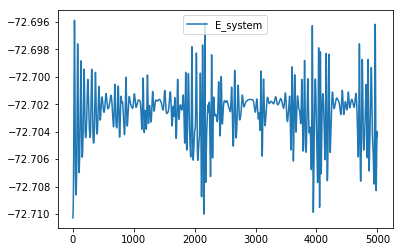

In [41]:
plt.plot(diagnostic['E_system'],label='E_system',)
plt.legend()

In [42]:
visualiser_trajectoire(pos,10)

NGLWidget(count=500)

## Test le potentiel de Harmonique sans exitation thermique

In [101]:
# Rigidite du ressort
k_spring = 1.
# Distance d'equilibre pour le potentiel
r_m = 1.
# Masse des particules
masse = 1.
# Pas de temps entre chaque etapes d'integration
dt = 0.001
# Temperature du system
T = 0
# Intensite de l'atractration de LJ
epsilon = 0.
# Genere les positions initiales
positions_initiales = faire_une_chaine_lineaire(10,r_m)
# Genere les vitesses initiales
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(0.5),size=positions_initiales.shape)

In [102]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=masse,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,
                           Nstep=5000,dt=dt)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

L'énergie du système est-elle conservée ?

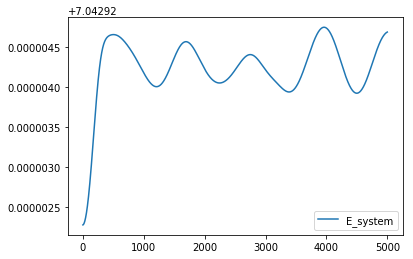

In [103]:
plt.plot(diagnostic['E_system'],label='E_system',)
plt.legend()

In [104]:
visualiser_trajectoire(pos,10)

NGLWidget(count=500)

## Test Avec l'effet de la temperature

In [43]:
# Rigidite du ressort
k_spring = 1.
# Intensite de l'atractration de LJ
epsilon = 1.
# Distance d'equilibre pour le potentiel
r_m = 1.
# Masse des particules
masse = 1.
# Pas de temps entre chaque etapes d'integration
dt = 0.001
# Temperature du system
T = 1.

# Genere les positions initiales
positions_initiales = faire_une_chaine_lineaire(10,r_m)
# Genere les vitesses initiales
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(1),size=positions_initiales.shape)

In [44]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=masse,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,
                           Nstep=5000,dt=dt)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

La variarion d'energie du system et du thermostat est-elle conservée ?

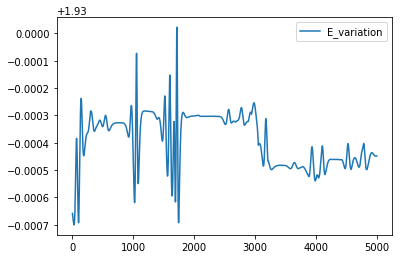

In [45]:
plt.plot(diagnostic['E_variation'],label='E_variation',)
plt.legend()

La temperature du system est-elle maintenue a la bone valeure

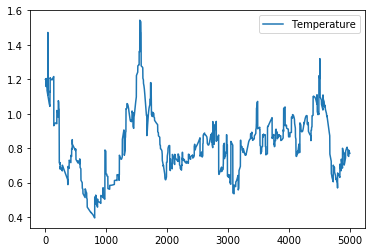

In [111]:
plt.plot(diagnostic['Temperature'],label='Temperature',)
plt.legend()

In [112]:
visualiser_trajectoire(pos,10)

NGLWidget(count=500)

# Simule la transition entre l'etat globulaire et l'etat elonge

In [4]:
from Exercise_functions import simulateur_NVT_efficace

In [5]:
# Intensite de l'atractration de LJ
epsilon = 1.
# Distance d'equilibre pour le potentiel
r_m = 1.
# Masse des particules
mass = 1.
# Pas de temps entre chaque etapes d'integration
dt = 0.01
# Temperature du system
T = 6.

# Rigidite du ressort. La rigidite du ressort est exprime en fonction de epsilon et de r_m pour que la forme du potentiel harmonique coincide avec celle du puit du potentiel de Lennard Jones
k_spring = 16.67 * epsilon / r_m**2

# Genere les positions initiales
positions_initiales = faire_une_chaine_circulaire(100,r_m)
# Genere les vitesses initiales
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(.1),size=positions_initiales.shape)

In [6]:
pos,vel,diagnostic = simulateur_NVT_efficace(positions_initiales,vitesses_initiales,mass=mass,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,Nstep=50000,dt=dt,enregistrement_stride=10)

HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))

In [7]:
visualiser_trajectoire(pos,1)

NGLWidget(count=5000)

des diagnostics

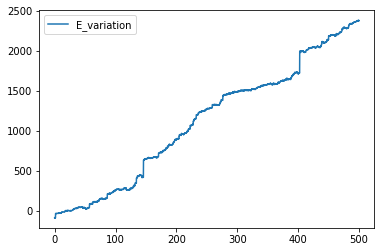

In [8]:
plt.plot(diagnostic['time'],diagnostic['E_variation'],label='E_variation',)
plt.legend()

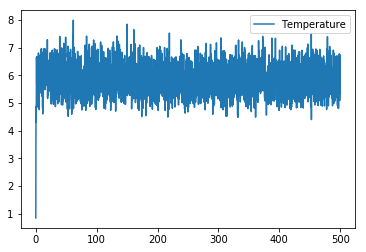

In [90]:
plt.plot(diagnostic['time'],diagnostic['Temperature'],label='Temperature',)
plt.legend()

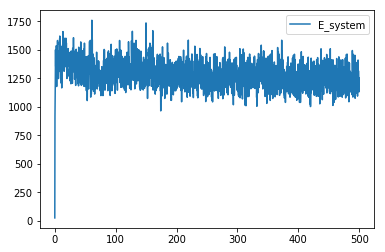

In [91]:
plt.plot(diagnostic['time'],diagnostic['E_system'],label='E_system',)
plt.legend()